In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [112]:
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

In [17]:
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


In [9]:
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [10]:
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


## Checking Missing Value

In [16]:
airbnb.isna().sum(axis=0)

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [19]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [20]:
airbnb.room_type.value_counts()

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

In [22]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

## Coordinates

In [29]:
airbnb["coordinates"] = airbnb["coordinates"].str.replace("(","").str.replace(")","")

In [42]:
airbnb["latitude"] = airbnb["coordinates"].str.split(",", expand = True)[0].astype(float)
airbnb["longitude"] = airbnb["coordinates"].str.split(",", expand = True)[1].astype(float)

In [46]:
airbnb.drop('coordinates', axis=1, inplace= True)

## Price

In [49]:
airbnb["price"] = airbnb.price.str.replace("$","").astype(float)

In [51]:
airbnb["price"].mean()

150.90512217564665

<Axes: xlabel='price', ylabel='Count'>

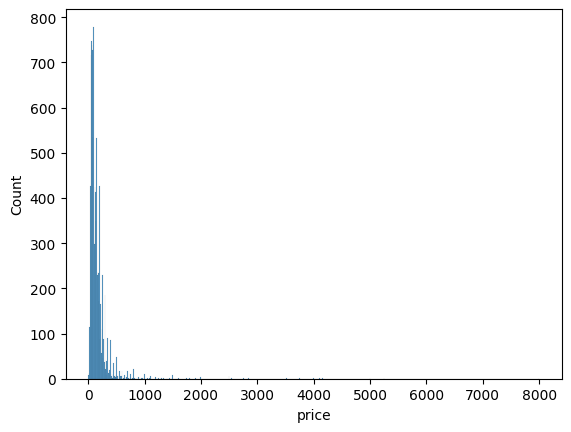

In [53]:
sns.histplot(airbnb["price"])

## Date

In [54]:
airbnb["listing_added"] = pd.to_datetime(airbnb["listing_added"])
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"])

## Text and Categorical Data Problem

In [63]:
airbnb['room_type'] = airbnb.room_type.str.strip().str.lower()

In [72]:
airbnb['room_type'].value_counts()

room_type
Entire Home     5186
private room    4607
shared room      226
Name: count, dtype: int64

In [71]:
mappings = { 'entire home/apt': "Entire Home",
            "privaete room" : "private room",
            'home': "Entire Home"}
airbnb['room_type'] = airbnb['room_type'].replace(mappings)

### Split the Neighborhood Column

In [74]:
airbnb["neighbourhood"] = airbnb["neighbourhood_full"].str.split(",", expand = True)[0]
airbnb["borough"] = airbnb["neighbourhood_full"].str.split(",", expand = True)[1]

In [76]:
airbnb.drop("neighbourhood_full", axis=1, inplace=True)

In [77]:
airbnb["neighbourhood"].value_counts()

neighbourhood
Manhattan        4449
Brooklyn         4086
Queens           1182
Bronx             229
Staten Island      73
Name: count, dtype: int64

In [78]:
airbnb["borough"].value_counts()

borough
Bedford-Stuyvesant    777
Williamsburg          766
Harlem                541
Bushwick              502
Hell's Kitchen        405
                     ... 
Bellerose               1
Navy Yard               1
Unionport               1
Baychester              1
New Springville         1
Name: count, Length: 198, dtype: int64

### Range of of Rating

In [81]:
airbnb["rating"].describe()

count    7944.000000
mean        4.014458
std         0.575064
min         3.000633
25%         3.520443
50%         4.027965
75%         4.516378
max         5.181114
Name: rating, dtype: float64

In [86]:
# show the record to verify which row is having rating greater than 
airbnb = airbnb[airbnb['rating'] <= 5]

### Example of GroupBy

In [89]:
airbnb.groupby(["neighbourhood", "room_type"])["room_type"].count()

neighbourhood  room_type   
Bronx          Entire Home       65
               private room     107
               shared room       12
Brooklyn       Entire Home     1631
               private room    1637
               shared room       55
Manhattan      Entire Home     2084
               private room    1261
               shared room       76
Queens         Entire Home      355
               private room     568
               shared room       27
Staten Island  Entire Home       29
               private room      34
Name: room_type, dtype: int64

In [93]:
airbnb.groupby(["neighbourhood", "room_type"])["price"].median()

neighbourhood  room_type   
Bronx          Entire Home      99.0
               private room     50.0
               shared room      28.0
Brooklyn       Entire Home     140.0
               private room     64.0
               shared room      38.0
Manhattan      Entire Home     185.0
               private room     86.0
               shared room      69.5
Queens         Entire Home     119.0
               private room     59.0
               shared room      35.0
Staten Island  Entire Home     107.5
               private room     50.0
Name: price, dtype: float64

### Example of Cross Tab

In [104]:
pd.crosstab(airbnb['room_type'], airbnb['neighbourhood'].fillna('n/a'))

neighbourhood,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire Home,65,1631,2084,355,29
private room,107,1637,1261,568,34
shared room,12,55,76,27,0


### Apply a function to the column

In [109]:
def rating_good_bad(row):
    if row["rating"] <2 :
        return "Bad"
    elif row["rating"] >2 and row["rating"] <3 :
        return "average"
    else:
        return "Good"

airbnb["rating_string"] = airbnb.apply(rating_good_bad, axis=1)

C:\Users\pk801\AppData\Local\Temp\ipykernel_1124\2928856954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb["rating_string"] = airbnb.apply(rating_good_bad, axis=1)


In [114]:
airbnb[airbnb['rating'] >= 2]

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
5,271954,Beautiful brownstone apartment,1423798,Aj,"Manhattan, Greenwich Village","(40.73388, -73.99452)",Entire home/apt,150$,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


In [110]:
airbnb["rating_string"].value_counts()

rating_string
Good    7941
Name: count, dtype: int64

### Missing Value Observation

In [83]:
airbnb

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,neighbourhood,borough
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Home,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Home,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Home,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire Home,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire Home,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire Home,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire Home,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill
